### APE on average InfoNCE loss across all combinations

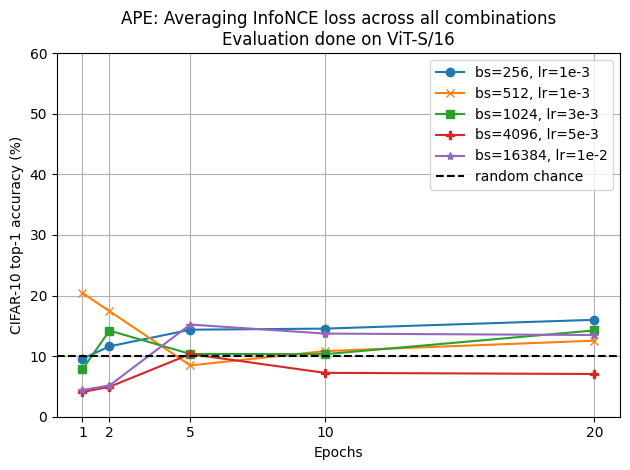

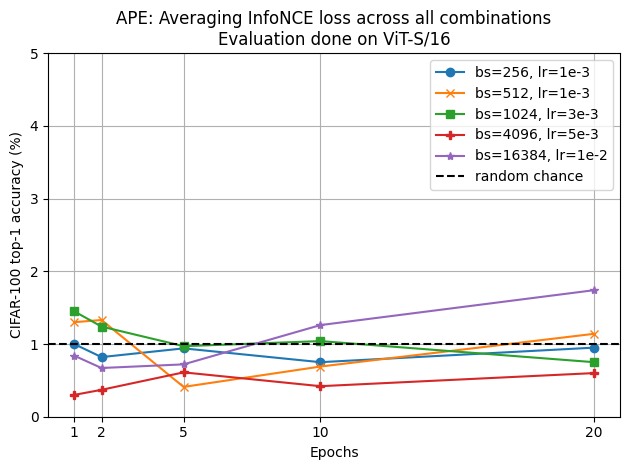

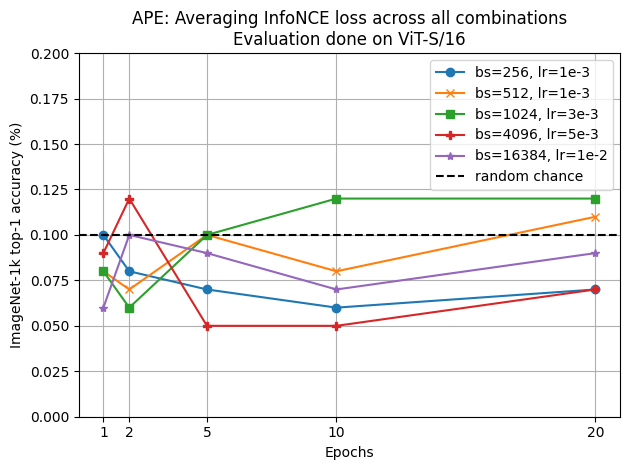

In [ ]:
from pylab import plt

data_256 = {'exp_name': 'vits_bs-256_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 9.56, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_2': {'cifar10': 11.61, 'cifar100': 0.82, 'imagenet1k': 0.08}, 'epoch_5': {'cifar10': 14.36, 'cifar100': 0.94, 'imagenet1k': 0.07}, 'epoch_10': {'cifar10': 14.54, 'cifar100': 0.75, 'imagenet1k': 0.06}, 'epoch_20': {'cifar10': 15.99, 'cifar100': 0.95, 'imagenet1k': 0.07}}}
data_512 = {'exp_name': 'vits_bs-512_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 20.42, 'cifar100': 1.3, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 17.43, 'cifar100': 1.33, 'imagenet1k': 0.07}, 'epoch_5': {'cifar10': 8.47, 'cifar100': 0.41, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.83, 'cifar100': 0.69, 'imagenet1k': 0.08}, 'epoch_20': {'cifar10': 12.55, 'cifar100': 1.14, 'imagenet1k': 0.11}}}
data_1024 = {'exp_name': 'vits_bs-1024_lr-0.003', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 7.83, 'cifar100': 1.45, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 14.21, 'cifar100': 1.24, 'imagenet1k': 0.06}, 'epoch_5': {'cifar10': 10.36, 'cifar100': 0.97, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.32, 'cifar100': 1.04, 'imagenet1k': 0.12}, 'epoch_20': {'cifar10': 14.24, 'cifar100': 0.75, 'imagenet1k': 0.12}}}
data_4096 = {'exp_name': 'vits_bs-4096_lr-0.005', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.08, 'cifar100': 0.3, 'imagenet1k': 0.09}, 'epoch_2': {'cifar10': 4.93, 'cifar100': 0.37, 'imagenet1k': 0.12}, 'epoch_5': {'cifar10': 10.34, 'cifar100': 0.61, 'imagenet1k': 0.05}, 'epoch_10': {'cifar10': 7.24, 'cifar100': 0.42, 'imagenet1k': 0.05}, 'epoch_20': {'cifar10': 7.05, 'cifar100': 0.6, 'imagenet1k': 0.07}}}
data_16384 = {'exp_name': 'vits_bs-16384_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.41, 'cifar100': 0.84, 'imagenet1k': 0.06}, 'epoch_2': {'cifar10': 5.15, 'cifar100': 0.67, 'imagenet1k': 0.1}, 'epoch_5': {'cifar10': 15.21, 'cifar100': 0.72, 'imagenet1k': 0.09}, 'epoch_10': {'cifar10': 13.72, 'cifar100': 1.26, 'imagenet1k': 0.07}, 'epoch_20': {'cifar10': 13.48, 'cifar100': 1.74, 'imagenet1k': 0.09}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 60.0], "cifar100": [0.0, 5.0], "imagenet1k": [0.0, 0.2]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=1e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-3")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=3e-3")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=5e-3")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=1e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'APE: Averaging InfoNCE loss\n6 combinations valuation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()

### Full MLP H-Net (`num_ie=12`, `encoder_batch_size=4`) Batch ablation

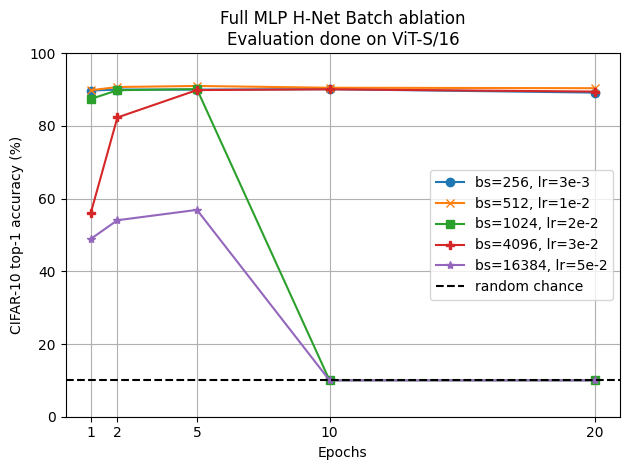

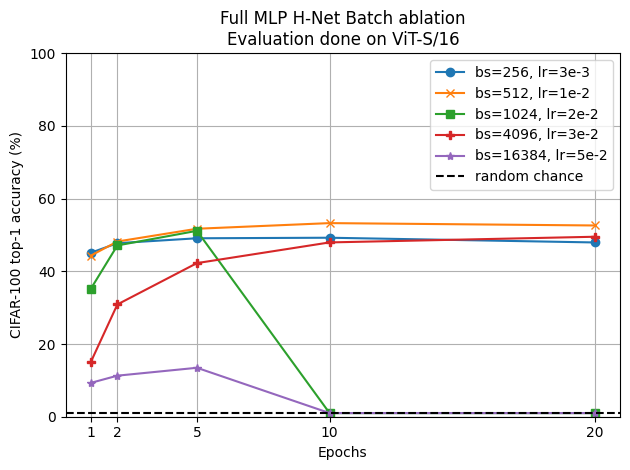

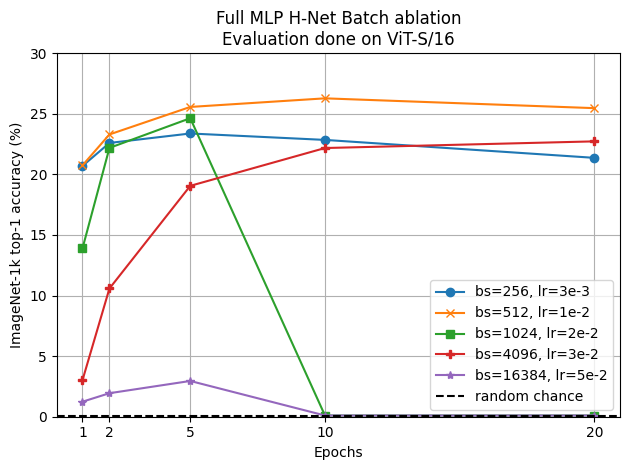

In [ ]:
from pylab import plt


data_256 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-256_lr-3e-3', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.71, 'cifar100': 45.1, 'imagenet1k': 20.69}, 'epoch_2': {'cifar10': 89.99, 'cifar100': 47.73, 'imagenet1k': 22.59}, 'epoch_5': {'cifar10': 89.97, 'cifar100': 49.08, 'imagenet1k': 23.37}, 'epoch_10': {'cifar10': 90.08, 'cifar100': 49.23, 'imagenet1k': 22.84}, 'epoch_20': {'cifar10': 89.15, 'cifar100': 47.93, 'imagenet1k': 21.36}}}
data_512 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
data_1024 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-1024_lr-2e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 87.4, 'cifar100': 35.19, 'imagenet1k': 13.89}, 'epoch_2': {'cifar10': 89.8, 'cifar100': 47.11, 'imagenet1k': 22.18}, 'epoch_5': {'cifar10': 90.1, 'cifar100': 51.13, 'imagenet1k': 24.63}, 'epoch_10': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_20': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}}}
data_4096 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-4096_lr-3e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 56.09, 'cifar100': 15.07, 'imagenet1k': 3.02}, 'epoch_2': {'cifar10': 82.3, 'cifar100': 30.88, 'imagenet1k': 10.58}, 'epoch_5': {'cifar10': 89.84, 'cifar100': 42.25, 'imagenet1k': 19.05}, 'epoch_10': {'cifar10': 90.05, 'cifar100': 47.94, 'imagenet1k': 22.17}, 'epoch_20': {'cifar10': 89.43, 'cifar100': 49.5, 'imagenet1k': 22.72}}} 
data_16384 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-16384_lr-5e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 48.91, 'cifar100': 9.31, 'imagenet1k': 1.24}, 'epoch_2': {'cifar10': 54.04, 'cifar100': 11.29, 'imagenet1k': 1.94}, 'epoch_5': {'cifar10': 56.89, 'cifar100': 13.46, 'imagenet1k': 2.95}, 'epoch_10': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_20': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 30]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=3e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-2")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=2e-2")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=3e-2")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=5e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'Full MLP H-Net Batch ablation\n12 combinations, evaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()


### Full MLP H-Net (`num_ie=12` `encoder_batch_size=4`) v/s APE

- One target model ViT-S/16
- Assume that APE was run for 12 combinations as well
- Take best h-params for both H-Net (`bs=512`, `lr=1e-2`) and APE (`bs=16384`, `lr=1e-2`)

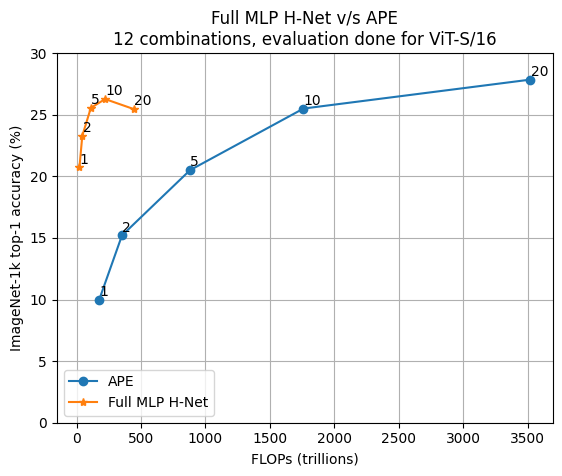

In [19]:

hnet = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
hnet_accs = [hnet["eval"][f"epoch_{e}"]["imagenet1k"] for e in [1, 2, 5, 10, 20]]
hnet_flops = [22.165 * e for e in [1, 2, 5, 10, 20]]

ape_accs = [10.0, 15.2, 20.5, 25.5, 27.85]
ape_flops = [14.675 * e * 12 for e in [1, 2, 5, 10, 20]]

plt.plot(ape_flops, ape_accs, label="APE", marker="o")
plt.plot(hnet_flops, hnet_accs, label="Full MLP H-Net", marker="*")
plt.xlabel("FLOPs (trillions)")
plt.ylabel("ImageNet-1k top-1 accuracy (%)")
plt.ylim([0.0, 30.0])
plt.legend()
plt.grid(True)

epochs = [1, 2, 5, 10, 20]
for i, ep in enumerate(epochs):
    plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.title("Full MLP H-Net v/s APE\n12 combinations, evaluation done for ViT-S/16")

plt.show()
